In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# two starting numbers and only one output number

# dimensions of input, hidden and output layers
N0 = 2
N1 = 30
N2 = 1

In [3]:
# activation function

# smooth function return values between 0 and 1
def sigmoid(x):
    
    s = 1 / (1 + np.exp(-x))           # nonlinear function for forward propagation
    ds = np.exp(-x) / (1 + np.exp(-x)) # derivative for brackward propagation
    
    return s, ds


# nonsmooth function return values 0 or 1
def theta(x):
    
    if x < 0:
        return 1
    else:
        return 0

In [4]:
# output function

# dictionary containing activation functions
activation_dict = {"theta": theta, "sigmoid": sigmoid}

# operations performed at each layer
def layer(act, v, w, b):
    
    z = np.dot(v, w) + b           # linear superposition of all neurons from the previous layer
    return activation_dict[act](z) # application of nonlinear function and calculation of the derivative


def backstep():
    
    print("DONE")

In [5]:
# making a network with n hidden layers

layer_count = 20

# weights and biases used for transition from input layer to first hidden layer
weights_in = np.random.uniform(low = -10, high = +10, size = (N2, N0))
bias_in = np.random.uniform(low = -1, high = +1, size = N2)

# weights and biases used for transition from hidden layer to hidden layer
weights_hidden = np.random.uniform(low = -10, high = +10, size = (layer_count, N0, N0))
bias_hidden = np.random.uniform(low = -1, high = +1, size = (layer_count, N0))

# weights and biases used for transition from last hidden layer to output layer
weights_out = np.random.uniform(low = -10, high = +10, size = (N2, N0))
bias_out = np.random.uniform(low = -1, high = +1, size = N2)

def network(y_in, activation, n):
    
    y_vals = y_in
    
    for i in range(n):
        y_vals = layer(activation, y_vals, weights_hidden[i], bias_hidden[i])
                                
    return layer(activation, y_vals, weights_out, bias_out)

In [6]:
# making a network with n hidden layers

# number of hidden layers, minimum number of hidden layers to be used: 1
layer_count = 10

# size of all the layers in a list
layers = [N0]

for l in range(layer_count):
    layers.append(N1)
    
layers.append(N2)

print("Layer structure of the network: ", layers)

# weights and biases used for transition from input layer to first hidden layer
weights_in = np.random.uniform(low = -10, high = +10, size = (N0, N1))
bias_in = np.random.uniform(low = -1, high = +1, size = N1)

# weights and biases used for transition from hidden layer to hidden layer
weights_hidden = np.random.uniform(low = -10, high = +10, size = (layer_count, N1, N1))
bias_hidden = np.random.uniform(low = -1, high = +1, size = (layer_count, N1))

# weights and biases used for transition from last hidden layer to output layer
weights_out = np.random.uniform(low = -10, high = +10, size = (N1, N2))
bias_out = np.random.uniform(low = -1, high = +1, size = N2)

# propagation through a network with at least one hidden layer
def network_multi(y_in, activation, n):
    
    # print(np.shape(y_in))
    
    # storage arrays
    layer_vals = [np.empty((M**2, layers[j])) for j in range(len(layers))]       # layer values (backward propagation)
    layer_vals_df = [np.empty((M**2, layers[j])) for j in range(1, len(layers))] # layer derivatives (backward propagation)    
    
    y_vals = y_in
    layer_vals[0] = y_vals
    
    y_vals, y_df = layer(activation, y_vals, weights_in, bias_in)
    layer_vals[1] = y_vals
    layer_vals_df[0] = y_df
    
    for i in range(n):
        y_vals, y_df = layer(activation, y_vals, weights_hidden[i], bias_hidden[i])
        layer_vals[i+2] = y_vals
        layer_vals_df[i+1] = y_df
                                    
    y_vals, y_df = layer(activation, y_vals, weights_out, bias_out)
    layer_vals[-1] = y_vals
    layer_vals_df[-1] = y_df
    
    return layer_vals, layer_vals_df

Layer structure of the network:  [2, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 1]


In [7]:
# visualize

M = 500

y1, y2 = np.meshgrid(np.linspace(-0.5, 0.5, M), np.linspace(-0.5, 0.5, M))

y1_flat = y1.flatten()
y2_flat = y2.flatten()

y_in = np.empty((len(y1_flat), 2))
y_in[:,0] = y1_flat
y_in[:,1] = y2_flat

# print(np.shape(y_in))

plotmatrix = network_multi(y_in, "sigmoid", layer_count)[0][-1]

plotmatrix = np.reshape(plotmatrix[:, 0], (M, M))

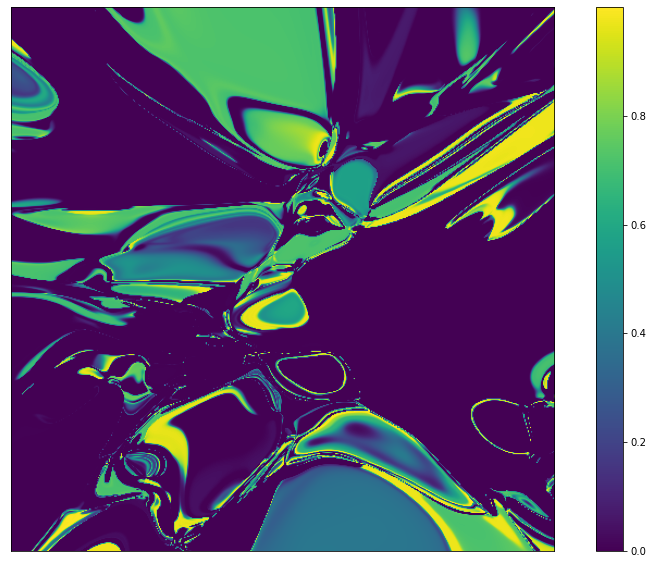

In [8]:
# plot

plt.figure(figsize = (15, 10), facecolor = "white")

plt.imshow(plotmatrix, origin = "lower")
plt.colorbar()

#, extent=(-0.5,0.5,-0.5,0.5)

plt.xticks([], [])
plt.yticks([], [])

# plt.hlines(50, 0, 99)
# plt.vlines(50, 0, 99)

# plt.xlim(0, 99)
# plt.ylim(0, 99)

plt.show()

In [9]:
# this is the main backpropagation

def backward_step(delta, w, df):
    
    return np.dot(delta, transpose(w)) * df

In [10]:
# backpropagation algorithm

def backpropagation(y_nn, y_nn_df, y_target):
    
    dw = [np.empty((layers[j], layers[j+1])) for j in range(len(layers)-1)]
    db = [np.empty((layers[j+1])) for j in range(len(layers)-1)]
    
    delta_y = (y_nn[-1] - y_target) * y_nn_df[-1]
    
    dw[-1] = np.dot(np.transpose(y_nn[-2]), delta_y) / M
    db[-1] = delta_y.sum(0) / M
    
    for i in range(len(layers)):
        
        delta_y = backward_step(delta_y, Weights[-1-j],df_layer[-2-j])
        dw_layer[-2-j]=dot(transpose(y_layer[-3-j]),delta)
        db_layer[-2-j]=delta.sum(0)/batchsize
    